In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
%matplotlib inline
sys.setrecursionlimit(10000)

## components for each color

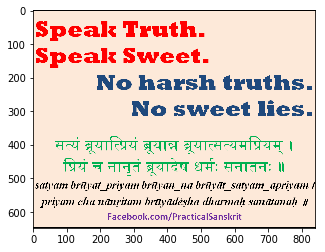

In [2]:
im = cv2.imread("../input_data/5_1.png",1)
# print(im.shape)
im = im[15:-15,15:-15]
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [10]:
def eightConnComp(i,j,c,visited,im,final):
    if(i<0 or i>=im.shape[0] or j<0 or j>=im.shape[1] or visited[i,j]==1):
        return 0
    visited[i,j] = 1
    if(im[i,j] == 1):
        final[i,j] = c
        eightConnComp(i+1,j,c,visited,im,final)
        eightConnComp(i,j+1,c,visited,im,final)
        eightConnComp(i-1,j,c,visited,im,final)
        eightConnComp(i,j-1,c,visited,im,final)
        eightConnComp(i+1,j+1,c,visited,im,final)
        eightConnComp(i-1,j-1,c,visited,im,final)
        eightConnComp(i-1,j+1,c,visited,im,final)
        eightConnComp(i+1,j-1,c,visited,im,final)
    return 0    

def fill(im):   
    h,w,c = im.shape
    count = 0
    visited = np.zeros((h,w))
    final = np.zeros((h,w,c),dtype= np.uint16)
    colors = []
    for i in range(100):
        c = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        colors += [c]
    for i in range(h):
        for j in range(w):
            if(im[i,j] == 1 and visited[i,j] == 0):
                eightConnComp(i,j,colors[j%100],visited,im,final)
                count += 1
    return final, count

In [11]:
colors, pix_cnt = np.unique(im.reshape(-1, im.shape[2]), axis=0, return_counts=True);
idx = np.flipud(np.argsort(pix_cnt))
colors = colors[idx[1:6],:]
print(colors)

[[125  73  31]
 [  0   0 255]
 [  0   0   0]
 [ 80 176   0]
 [160  48 112]]


In [5]:
h,w,c = im.shape

fig = plt.figure()
count = 0

new_masks = np.zeros((6,h,w))

for k,c in enumerate(colors):
    print(c)
    for i in range(h):
        for j in range(w):
            if np.array_equal(im[i,j,:],c):
                new_masks[k,i,j] = 1
                

[125  73  31]
[  0   0 255]
[0 0 0]
[ 80 176   0]
[160  48 112]


<Figure size 432x288 with 0 Axes>

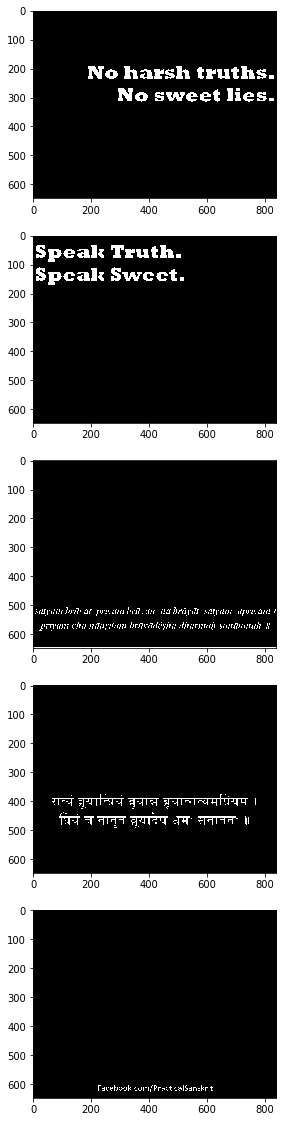

In [6]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.imshow(new_masks[i],cmap='gray')

In [7]:
counts = []
for i in new_masks:
    out,c = fill(i)
    counts.append(c)

In [9]:
for i in range(len(colors)):
    print("No of components of color " + str(colors[i]) +" = "+str(counts[i]))
# print(counts)

No of components of color [125  73  31] = 27
No of components of color [  0   0 255] = 24
No of components of color [0 0 0] = 242
No of components of color [ 80 176   0] = 74
No of components of color [160  48 112] = 34
